# Introduction To Seaborn

    Seaborn's official website:
    If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.
    
In pratice, the "*well-defined set of hard things*" includes:
- Using default themes that are aestetically pleasing.
- Setting custom color palletes.
- Making attractive statistical plots.
- Easily and flexibly displaying distributions.
- Visualizing information from matrices and DataFrames. 

Those last three points make seaborn the best tool for exploratory analysis, because we get to know our data quickly and efficiently. But allways keep this in mind: *Seaborn* **is not a substitute** of *Matplotlib*, it **is a complement.** 

As always, keep the [Seaborn Documentation](http://seaborn.pydata.org/api.html) open in another tab for futher understanding.

# Picking Our Pokemon Master Tools
Before getting ourselves into our adventure, we gotta package all the necessary things to do so:

In [31]:
#Pandas for managing datasets:
import pandas as pd
#Matplotlib for further custimization:
from matplotlib import pyplot as plt
%matplotlib inline
#Then our main pokeball:
import seaborn as sns
#Now, our map to find the pokemons we wanna catch!
df = pd.read_csv('Pokemon.csv', encoding = "ISO-8859-1", index_col=0)
#Quick look at our map:2

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Learning To Throw A Pokeball
One of Seaborn's **greatest strenghts** is its simpliciry and diversity of plotting functions. i.e. *lmplot()* and you have a scatterplot ready to catch pokemons! There are two ways you can use it:
- 1st way (recommended): pass you *df* to the *data=* argument, and pass column names to the axis (x=, y=) arguments.
- 2nd way: directly pass in Series of data to the axes arguments.

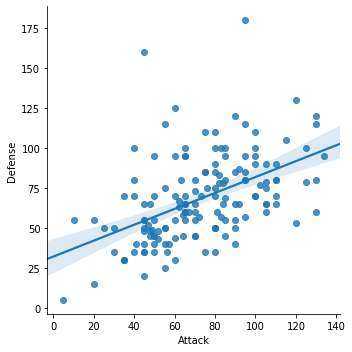

In [33]:
#Let's compare the Attack and Defense stats for our Pokémon:
#Recommended way:
sns.lmplot(x='Attack', y='Defense', data=df)
#Alt. way:
#sns.lmplot(x=df.Attack, y=df.Defense)

You see a diagonal line because we are using *Seaborn's* function for fitting and plotting a regression line. We are using this because *Seaborn* desn't have a scatterplot dedicated function. 

Thankfully we can trick this function to make it more as a scatterplot with some useful options that it has:
1. We set *fit_reg=False* to remove the regression line.
2. We set *hue='Stage'* to color our points by the Pokémon's evolution stage. 
   - This hue argument is very useful because it allows you to express a third dimension of information using color.

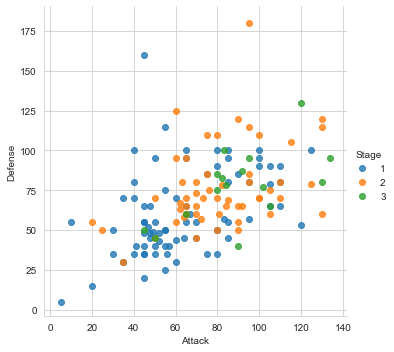

In [56]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, #<- Remove regression line
           hue='Stage')   #<- Color by evolution stage

The plot is getting better, but we can still improve it. i.e. All of our Pokemon have only positive attack y def values, yet our axes limits fall below zero, let's fix that.

# Catching Wild Pokemons With The Specialized Pokeball
*Seaborn* will get you most of the way there, but sometimes you'll need to bring *matplotlib*.

For setting axes limits we would need to bring *matplotlib*, but is pretty straight forward.
1. Invoke you *seaborn* plotfunct. as normal
2. Invoke *matplotplib* customization functs. In this case, ylim() and xlim(). 

(0, 141.97310248937742)

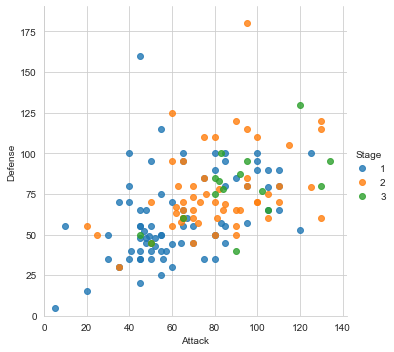

In [73]:
#Here's our new scatter plot with sensible axes limits:
#Plot usign seaborn:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, #<- Remove regression line
           hue='Stage') 
#Tweak using matplotlib:
plt.ylim(0, None)
plt.xlim(0, None)

As with *Seaborn*, for mor information about *malplotlib*, check its [Documentation](https://matplotlib.org/users/pyplot_tutorial.html)

# Tacking Advantage Of Our Map
*Seaborn* is an amazing pokeball, but to get the most of it we should have a good map, that's why *pandas* is so impor

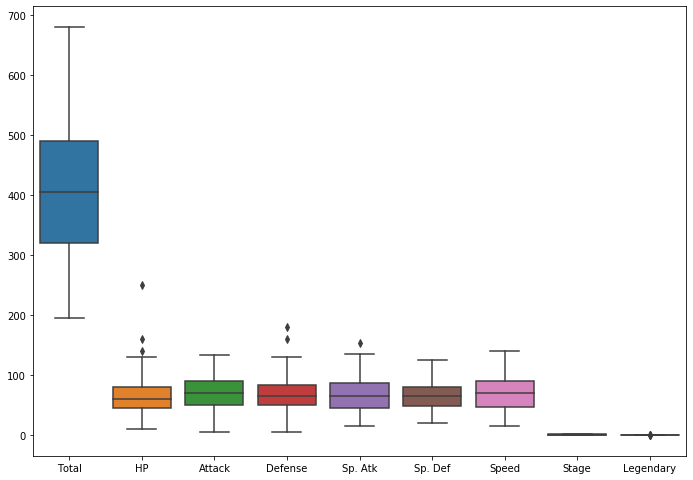

In [42]:
#In example, let's say that we want to make a boxpot for our pokemon's combat stats:
a4_dims = (11.7, 8.27) #<- This
fig, ax = plt.subplots(figsize=a4_dims) #<- And this is just for changing the plot size.
sns.boxplot(data=df)   

That's a reasonable start, but we have some columns that we might want to remove:
- Total, since we have individual stats (and that's what we are interested in).
- Stage & Legendary columns since those aren't combat stats.

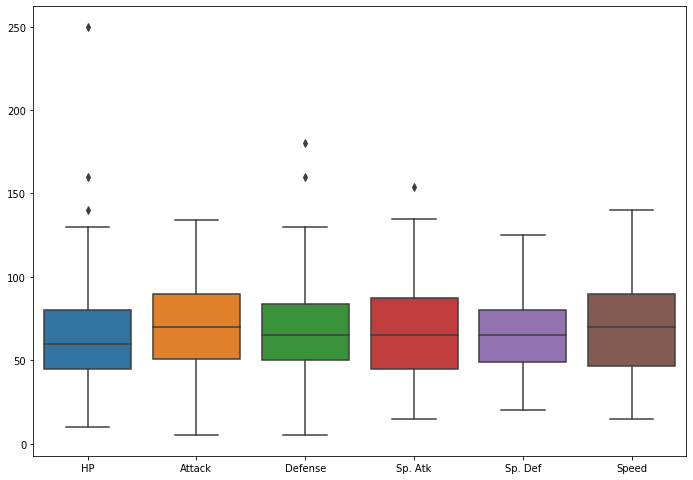

In [44]:
#To do so, we create a new DataFrame that only contains the variables of interest (the stats variables):
#Pre-Format df:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
#New boxplot with new df:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=stats_df)

Here is a [Pandas CheatSheed](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) for further use of it.

# Pokeball Themes
This is another advantage of *Seaborn*, it comes with descent style themes. The default one is *'darkgrid'*. 

Now we'll change it to *'whitegrid'* for making a *violin plot*.
- Those are useful alts. To boxplots.
- They show the distribution (through the thickness of the violin) instead of only the summary statistics.

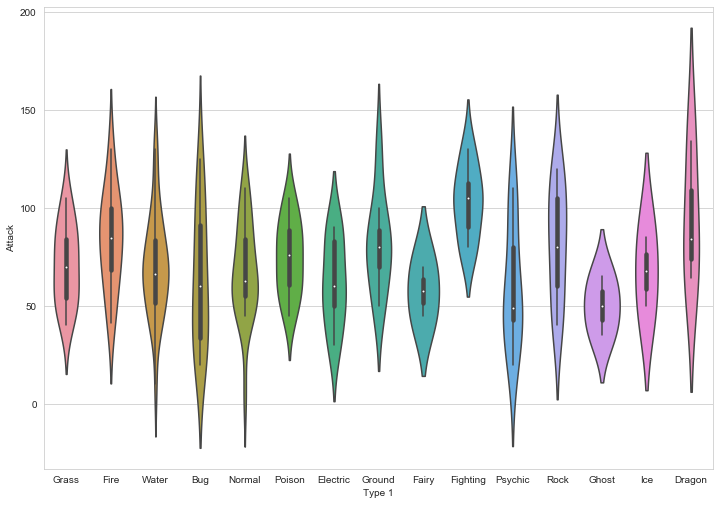

In [48]:
#For example, we can visualize the distribution of Attack by Pokémon's primary type:
#Set theme:
sns.set_style('whitegrid')
#Violin plot:
a4_dims = (12, 8.5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x='Type 1', y='Attack', data=df)

As we clearly see here, Dragon type attacks are the ones that have higher attack, but also a lot of variance.

# Pokeball Color Palletes
As we see here, grass, water and many other types have color that doesn't fit quite well their attribute, let's fix that!
*Seaborn* allows is to easily change this by setting custom color palettes.

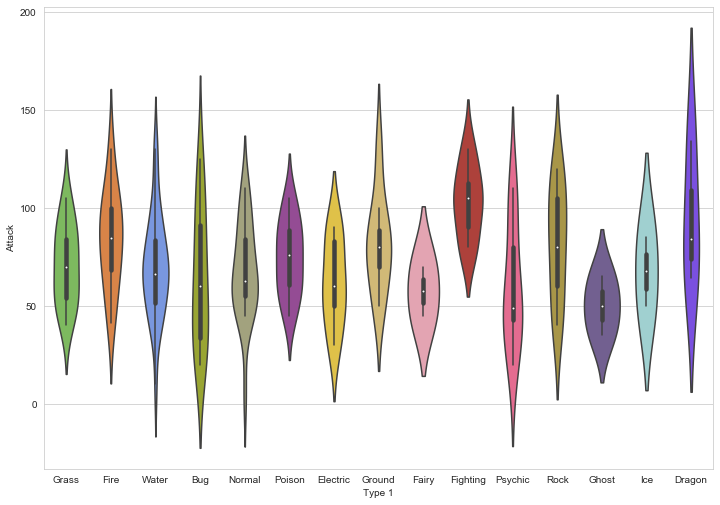

In [61]:
#We can simply create an ordered Python list of color hex values.
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
#Now we simply use the pallete= function and pass our custom pallete as its argument.
a4_dims = (12, 8.5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

**Violin plots** are really good for visualizing distributions. But, since we only have 151 pokemons (observations) in our dataset, we may want to simply display each point.
 That's where the **swarm plot** comes in! It will show each point and stack the ones with similar values.

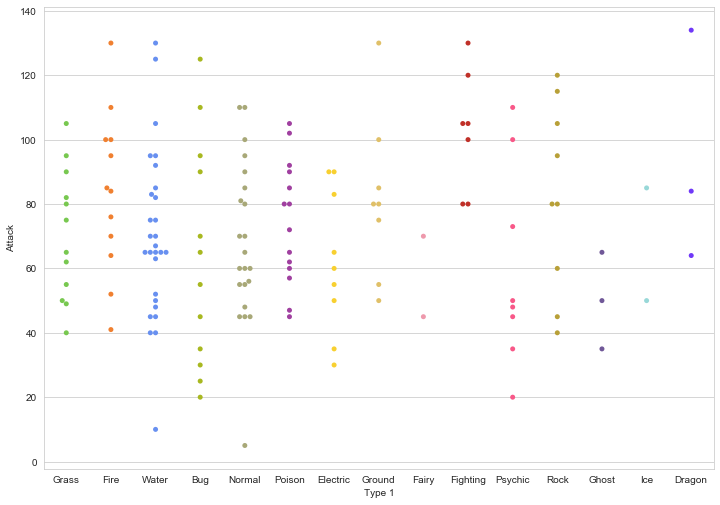

In [63]:
# Swarm plot with Pokemon color palette
a4_dims = (12, 8.5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Looks really nice! and it would look better if we could display swarm and violin plots together. Wait! we can do that.

# The Never Seen Before, Two Pokemons In One Pokeball
It's pretty straightforward to overlay plots with *seaborn*, and works the same way with *matplotlib*.
1. We make our figure larger using *matplotlib*.
2. We plot the violin plot BUT, with this tweak: inner = None (to remove the bars inside the violins).
3. Plot the swarm plot, BUT with the points black so is easier to discern them.
4. Set a tittle usong *maltplotlib*.

Text(0.5, 1.0, 'Attack by type')

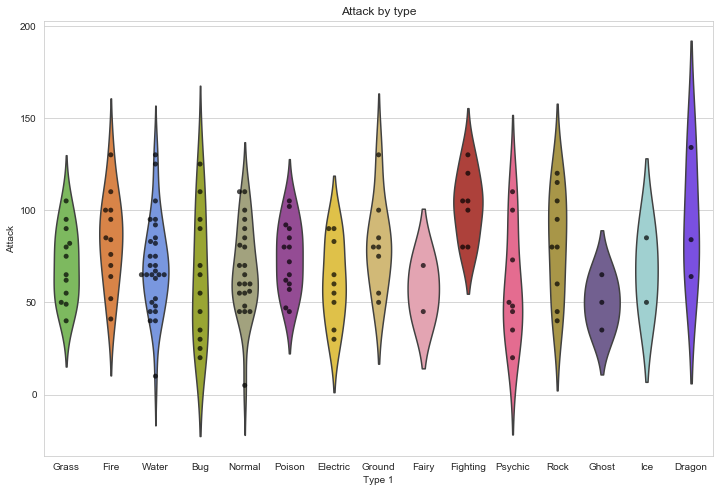

In [68]:
#Set figure size with matplotlib:
plt.figure(figsize=(12,8))
#Create plot:
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
#Set title with matplotlib:
plt.title('Attack by type')

Perfect, we have our *'attack by type'* chart. What if we want to see all of the other stats as well?

# Creating The Legendary Pokemon
We could do what we have just done with every stat, but that would be suboptimal. We just need to do some **data wrangling** with *pandas* before plotting.

In [74]:
#Let's remember how our data is formated:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


Here we see that all our stats are in separated columns, what we want to do is 'melt' them into one.

To do so, we use *pandas melt()* function. It has three arguments:
- The DataFrame to melt.
- ID vars to keep (these are the ones that **won't** be melted).
- A name for the new melted var.

In [77]:
#Out output will be something like this:
melted_df = pd.melt(stats_df,
                    id_vars=['Name', 'Type 1', 'Type 2'],
                            var_name='Stat')
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

Print these two DataFrames to confirm.

In [79]:
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


see? less variables but more observations.

Now let's make our swarm plot with the melted df.
- This time we are going to set x='Stat' and y='value' So our swarm is separated by stats.
- Then, well set hue='Type 1' so the color of the points maps to the pokemon type.

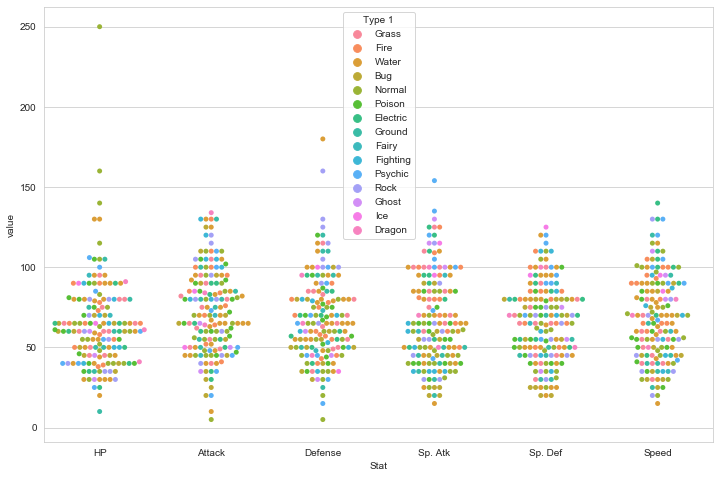

In [92]:
#swarm plot with melted df:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Stat', y='value', data=melted_df,
              hue='Type 1')

Looks great, let's make a few adjustments for a more readable chart:
- Enlarge the plot
- Separate points by using the arg *split=True*
- Use our custom pokemon palette
- place the legend to the right
- And in case it isn't solved yet. Adjust the y-axis limits to end at 0.

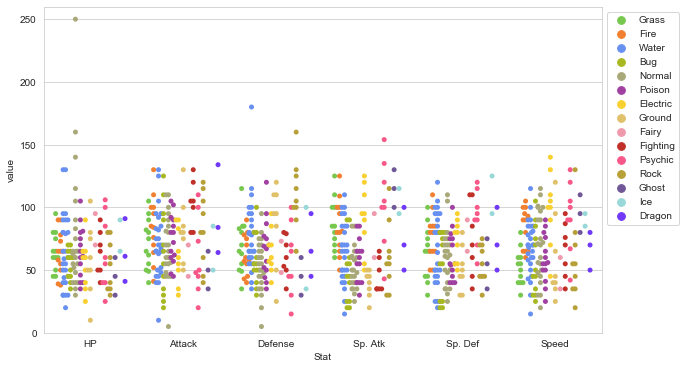

In [91]:
#Enlarge the plot:
plt.figure(figsize=(10,6))

sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1',
              split=True,  #<- Separate points by hue
              palette=pkmn_type_colors) #<-  Use Pokemon palette

#Adjust y-axis:
plt.ylim(0,260)

#Place legend to the right:
plt.legend(bbox_to_anchor=(1,1), loc=2)

And there we have it!!

# Pokédex (our mini-gallery)
Let's conclude with this section, that will be a Pokédex of some amazing stuff that can be done with *seaborn*.

### Headmap
#### It helps you visualize matrix-like data

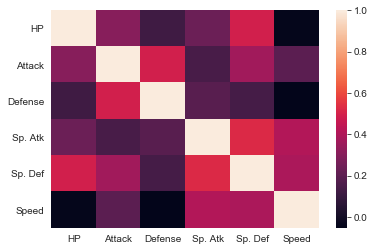

In [94]:
#Calculate correlations:
corr = stats_df.corr()

#Headmap:
sns.heatmap(corr)

### Histogram
#### It allow you to plot the distributions of numeric variables.

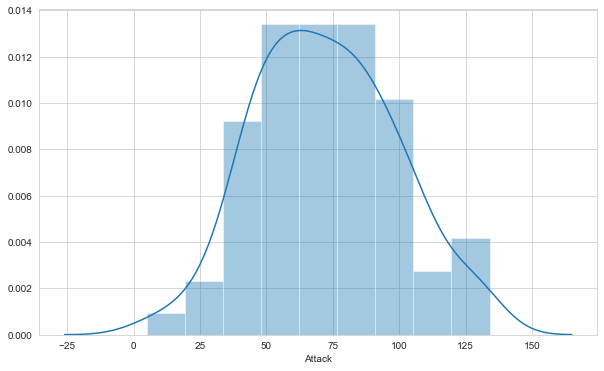

In [96]:
1
2
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(10,6))
sns.distplot(df.Attack)

### Bar Plot
#### It help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

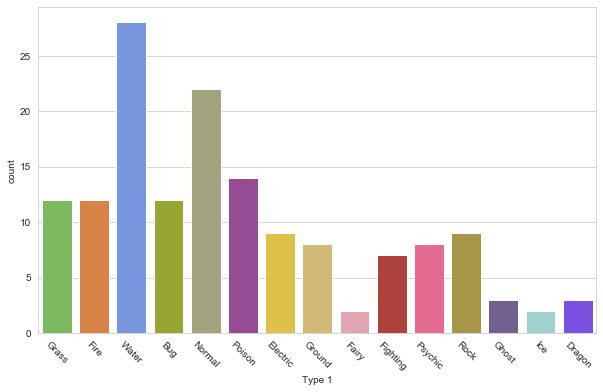

In [103]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(10,6))
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Factor Plot
#### It makes it easy to separate plots by categorical classes.

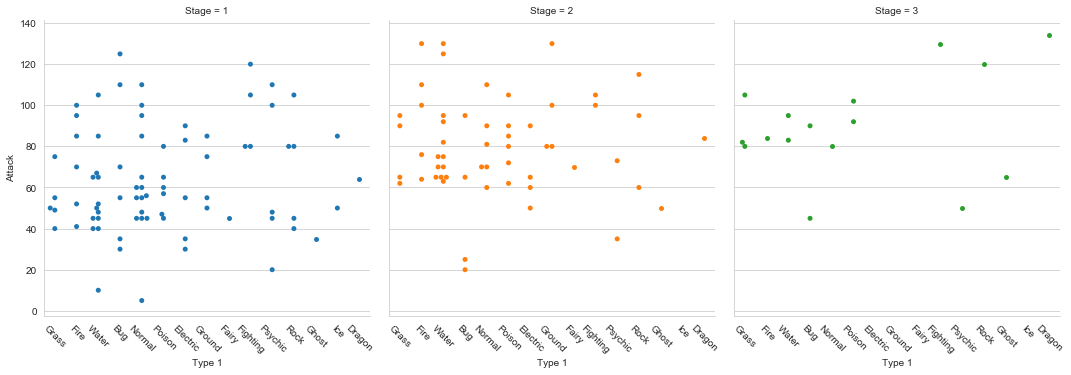

In [101]:
#Factor plot:
g = sns.catplot(x='Type 1',
                   y='Attack',
                   data=df,
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot

#Rotate x-axis labels:
g.set_xticklabels(rotation=-45)

# Doesn't work because only rotates last plot:
# plt.xticks(rotation=-45)

### Density Plot
#### They display the distribution between two variables.
##### Tip: Consider overlaying this with a scatter plot.

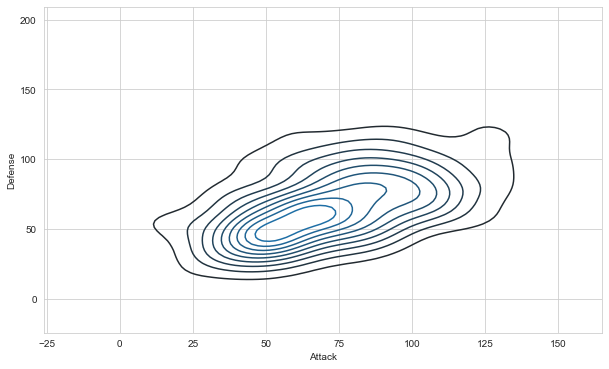

In [105]:
# Density Plot
plt.figure(figsize=(10,6))
sns.kdeplot(df.Attack, df.Defense)

### Joint Distribution Plot
#### These combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

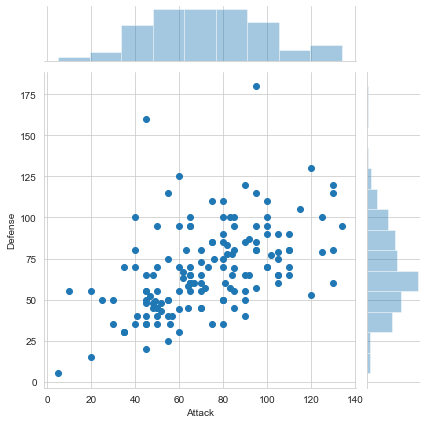

In [109]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

And we are finally done! Another good reference for projects is the [Official Seaborn Gallery](http://seaborn.pydata.org/examples/)